In [ ]:
#Artificial Neural Network(ANN)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#check availability of GPU
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fmnist_small.csv')

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [ ]:
df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [ ]:
temp=df.drop('label',axis=1)
temp

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,1,...,69,12,0,0,0,0,0,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,0,0,0,0,0,0,0,0,0,0,...,39,47,2,0,0,29,0,0,0,0
5998,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
temp.index

RangeIndex(start=0, stop=6000, step=1)

In [ ]:
temp[temp.index==0].values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 125,  72,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0, 120, 108,   0,   0,   4,   6,  11,  17,  80,  24,
        224,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   3,   0,   0, 208, 230, 187, 226, 236, 242, 213, 221,
        239, 247, 137,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   5,   0,   0, 199, 210, 206, 200, 205, 208,
        208, 216, 213, 244,  88,   0,   3,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   4,   0,   6, 213, 218, 201, 197,
        207, 212, 209, 219, 220, 240,  77,   0,   3,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   7,   0,  21, 222, 216,
        197, 202, 210, 213, 214, 221, 220, 235,  65,   0,   3,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

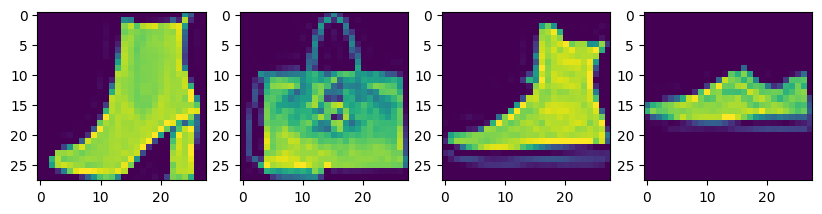

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(141)
plt.imshow(temp[temp.index==0].values.reshape(28,28))
plt.subplot(142)
plt.imshow(temp[temp.index==3].values.reshape(28,28))
plt.subplot(143)
plt.imshow(temp[temp.index==88].values.reshape(28,28))
plt.subplot(144)
plt.imshow(temp[temp.index==1000].values.reshape(28,28))

In [ ]:
x=df.drop('label', axis=1).values.astype(float)

In [ ]:
y=df['label'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,shuffle=True)

In [ ]:
x_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  0.,  0.]])

In [ ]:
y_train

array([7, 6, 7, ..., 0, 8, 6])

In [ ]:
#Normalize the pixel values
x_train/=255.0
x_test/=255.0

In [ ]:
x_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [ ]:
xtrain_tensor=torch.tensor(x_train,dtype=torch.float32)
xtest_tensor=torch.tensor(x_test,dtype=torch.float32)
ytrain_tensor=torch.tensor(y_train,dtype=torch.long)
ytest_tensor=torch.tensor(y_test,dtype=torch.long)

In [ ]:
class CustomDataset(Dataset):
  def __init__(self,x,y):
    self.features=x
    self.labels=y
  def __len__(self):
    return self.features.shape[0]
  def __getitem__(self,index):
    return self.features[index],self.labels[index]


In [ ]:
train_dataset = CustomDataset(xtrain_tensor, ytrain_tensor)

In [ ]:
test_dataset=CustomDataset(xtest_tensor,ytest_tensor)

In [ ]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [ ]:
import torch.nn as nn

In [ ]:
xtest_tensor.shape

torch.Size([1200, 784])

In [ ]:
#Model Defination
class Model(nn.Module):
  def __init__(self,features):
    super().__init__()
    self.network=nn.Sequential(
        nn.Linear(features.shape[1],128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self,features):
    return self.network(features)

In [ ]:
#Model Instance Creation
model=Model(xtrain_tensor)

In [ ]:
#parameters
learning_rate=0.1
epochs=100

In [ ]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
#Model loop
for epoch in range(epochs):
  total_epoch_loss=0
  for train_batch,labels_batch in train_loader:
    #forward pass
    y_pred=model(train_batch)

    #loss_calculation
    loss=loss_function(y_pred,labels_batch)

    #zero optimizer
    optimizer.zero_grad()

    #backward prop
    loss.backward()

    #update parameters
    optimizer.step()
    total_epoch_loss=total_epoch_loss + loss.item()
  avg_loss=total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch+1}, Loss: {avg_loss}')

Epoch: 1, Loss: 1.334047293663025
Epoch: 2, Loss: 0.7900225281715393
Epoch: 3, Loss: 0.6688739641507466
Epoch: 4, Loss: 0.5918189825614294
Epoch: 5, Loss: 0.5411660271883011
Epoch: 6, Loss: 0.4995722550153732
Epoch: 7, Loss: 0.470606184999148
Epoch: 8, Loss: 0.4545164426167806
Epoch: 9, Loss: 0.4249582585692406
Epoch: 10, Loss: 0.4055937108397484
Epoch: 11, Loss: 0.38083643903334935
Epoch: 12, Loss: 0.36811941633621853
Epoch: 13, Loss: 0.35338096573948863
Epoch: 14, Loss: 0.32960903535286584
Epoch: 15, Loss: 0.3328995032608509
Epoch: 16, Loss: 0.31271220872799554
Epoch: 17, Loss: 0.29338610408206783
Epoch: 18, Loss: 0.2844707595805327
Epoch: 19, Loss: 0.27975516378879545
Epoch: 20, Loss: 0.2633844161530336
Epoch: 21, Loss: 0.2671411394576232
Epoch: 22, Loss: 0.2493796128531297
Epoch: 23, Loss: 0.24897646526495615
Epoch: 24, Loss: 0.22866453908383846
Epoch: 25, Loss: 0.24246565664807956
Epoch: 26, Loss: 0.21793767606218656
Epoch: 27, Loss: 0.20040459007024766
Epoch: 28, Loss: 0.19596004

In [ ]:
model.eval()

Model(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
#test accuracy
total=0
correct=0
with torch.no_grad():
  for test_batch,test_labels in test_loader:
    test_batch,test_labels=test_batch.to(device),test_labels.to(device)
    output=model(test_batch)
    _, predicted=torch.max(output,1)
    total=total+test_labels.shape[0]
    correct=correct + (predicted==test_labels).sum().item()

print(correct/total)

0.8408333333333333


In [ ]:
#training data accuracy
total=0
correct=0
with torch.no_grad():
  for train_batch,train_labels in train_loader:
    train_batch,train_labels=train_batch.to(device),train_labels.to(device)
    output=model(train_batch)
    _, predicted=torch.max(output,1)
    total=total+train_labels.shape[0]
    correct=correct + (predicted==train_labels).sum().item()

print(correct/total)

0.9997916666666666


OBSERVATION
Overfitting
